In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from keras.models import Model
from keras.layers.merge import concatenate
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.applications import VGG16, VGG19
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate
import os

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Deep Learning/CNN/Skin cancer dataset.zip (Unzipped Files)/Skin cancer dataset/train",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2077 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Deep Learning/CNN/Skin cancer dataset.zip (Unzipped Files)/Skin cancer dataset/validation",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 560 files belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Deep Learning/CNN/Skin cancer dataset.zip (Unzipped Files)/Skin cancer dataset/test",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 660 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
class_names

['benign', 'malignant']

In [ ]:
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]


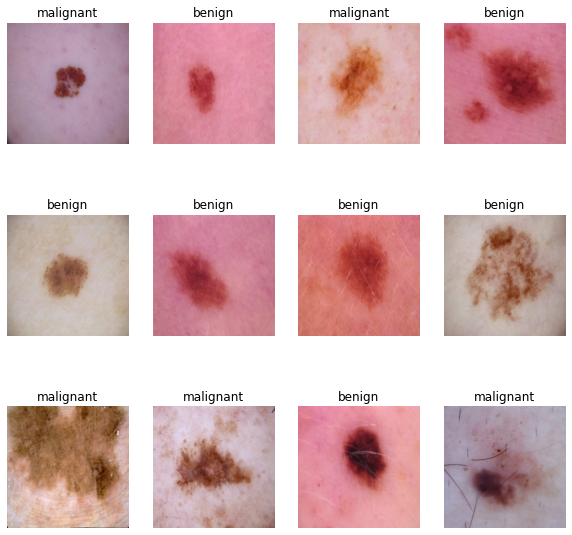

In [ ]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in train_ds.take(1):
    for i in range(12):
        plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)     # all this is to improve the performacne
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)    
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)     

In [ ]:
'''
These layers are for preprocessing and we will use it later while model building. One is to resize the image and other divides
the size of 256 by 255 to get a number between 0 and 1
'''
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
'''
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.
'''
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
65/65 [==============================] - 231s 1s/step - loss: 0.6561 - accuracy: 0.5758 - val_loss: 0.5535 - val_accuracy: 0.7625
Epoch 2/50
65/65 [==============================] - 5s 76ms/step - loss: 0.5249 - accuracy: 0.7453 - val_loss: 0.4601 - val_accuracy: 0.7714
Epoch 3/50
65/65 [==============================] - 5s 75ms/step - loss: 0.4990 - accuracy: 0.7530 - val_loss: 0.5047 - val_accuracy: 0.7518
Epoch 4/50
65/65 [==============================] - 5s 77ms/step - loss: 0.4841 - accuracy: 0.7588 - val_loss: 0.4386 - val_accuracy: 0.7786
Epoch 5/50
65/65 [==============================] - 5s 76ms/step - loss: 0.4666 - accuracy: 0.7675 - val_loss: 0.3850 - val_accuracy: 0.8071
Epoch 6/50
65/65 [==============================] - 5s 75ms/step - loss: 0.4636 - accuracy: 0.7650 - val_loss: 0.3701 - val_accuracy: 0.7964
Epoch 7/50
65/65 [==============================] - 5s 76ms/step - loss: 0.4349 - accuracy: 0.7882 - val_loss: 0.4361 - val_accuracy: 0.7554
Epoch 8/50
65

In [ ]:
scores = model.evaluate(test_ds)

21/21 [==============================] - 84s 42ms/step - loss: 0.3306 - accuracy: 0.8288


In [ ]:
scores

[0.3306291103363037, 0.8287878632545471]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 65}

In [ ]:
history.history

{'loss': [0.6560721397399902,
  0.5248718857765198,
  0.4990212619304657,
  0.4840955138206482,
  0.46658843755722046,
  0.4636266231536865,
  0.43493688106536865,
  0.4425548315048218,
  0.44314301013946533,
  0.40800270438194275,
  0.4185746908187866,
  0.4149632453918457,
  0.40219953656196594,
  0.434030145406723,
  0.38880500197410583,
  0.3733886778354645,
  0.36589232087135315,
  0.3709578216075897,
  0.3657477796077728,
  0.3616740107536316,
  0.3584025204181671,
  0.3402493894100189,
  0.36769160628318787,
  0.3759783208370209,
  0.3516619801521301,
  0.3555419147014618,
  0.34837549924850464,
  0.3333986699581146,
  0.33956533670425415,
  0.3223850429058075,
  0.3389761447906494,
  0.33372175693511963,
  0.3242930769920349,
  0.3405502140522003,
  0.31992658972740173,
  0.32700181007385254,
  0.34204283356666565,
  0.3796583116054535,
  0.33526140451431274,
  0.32027655839920044,
  0.3220214545726776,
  0.3233080208301544,
  0.32213425636291504,
  0.30134183168411255,
  0.303

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

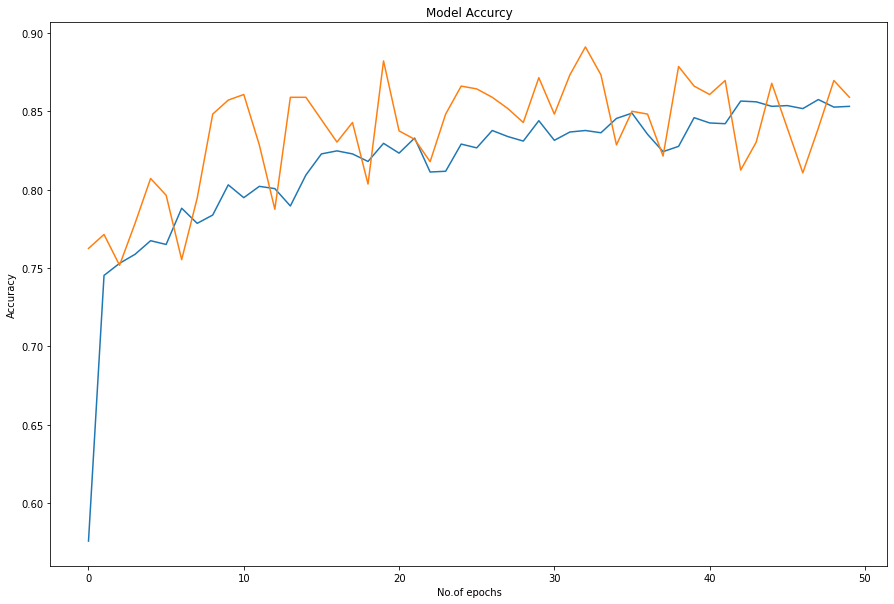

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accurcy')
plt.xlabel('No.of epochs')
plt.ylabel('Accuracy')
plt.show()

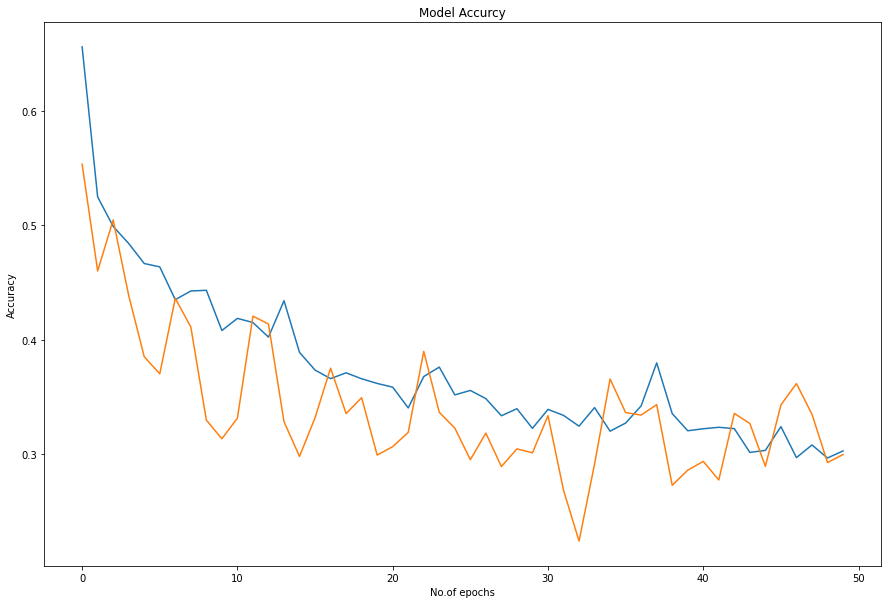

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accurcy')
plt.xlabel('No.of epochs')
plt.ylabel('Accuracy')
plt.show()

first image to predict
actual label: benign
predicted label: malignant


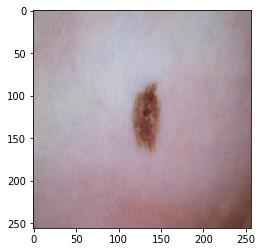

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

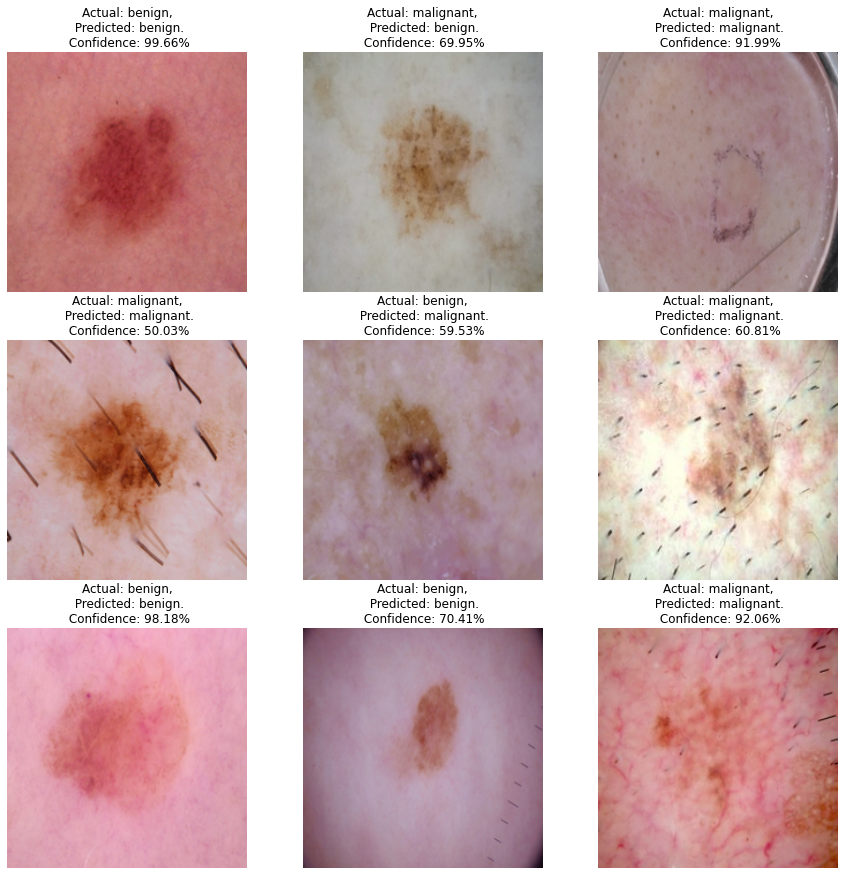

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
model.save("/content/drive/MyDrive/Deep Learning/CNN/SC_model.h5")

# **ResNest50**

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

resnet50 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=input_shape,
    classes=2
)

In [ ]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
resnet50.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = resnet50.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
65/65 [==============================] - 288s 4s/step - loss: 0.8183 - accuracy: 0.7265 - val_loss: 4.2336 - val_accuracy: 0.4589
Epoch 2/50
65/65 [==============================] - 31s 462ms/step - loss: 0.4623 - accuracy: 0.7655 - val_loss: 0.7585 - val_accuracy: 0.4643
Epoch 3/50
65/65 [==============================] - 30s 450ms/step - loss: 0.6101 - accuracy: 0.7342 - val_loss: 10.0460 - val_accuracy: 0.5661
Epoch 4/50
65/65 [==============================] - 30s 453ms/step - loss: 0.5017 - accuracy: 0.7520 - val_loss: 5.1275 - val_accuracy: 0.7750
Epoch 5/50
65/65 [==============================] - 30s 452ms/step - loss: 0.5427 - accuracy: 0.7578 - val_loss: 432.6786 - val_accuracy: 0.5536
Epoch 6/50
65/65 [==============================] - 30s 453ms/step - loss: 0.5313 - accuracy: 0.7530 - val_loss: 8.3358 - val_accuracy: 0.6946
Epoch 7/50
65/65 [==============================] - 30s 450ms/step - loss: 0.5116 - accuracy: 0.7569 - val_loss: 0.4975 - val_accuracy: 0.810

In [ ]:
scores = resnet50.evaluate(test_ds)

21/21 [==============================] - 114s 3s/step - loss: 0.4465 - accuracy: 0.7758


In [ ]:
def predict(resnet50, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = resnet50.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

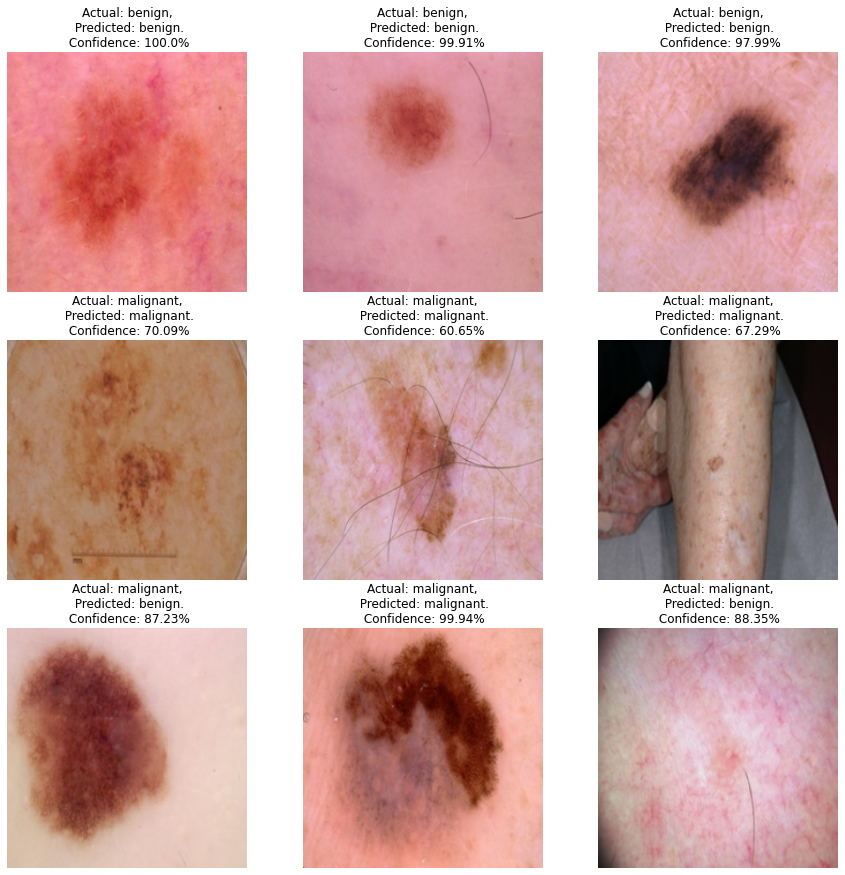

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(resnet50, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
resnet50.save("/content/drive/MyDrive/Deep Learning/CNN/SC_resnet50_model.h5")